# Regression with Linear and MLP models

We will examine a simple regression problem with a single predictive variable, similar to that shown in class.

We generate data from a two-dimensional normal distribution.

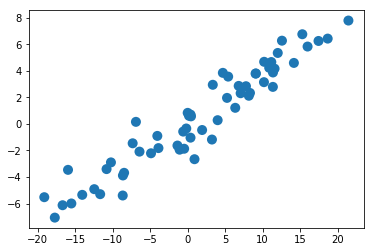

In [11]:
import numpy as np
import matplotlib.pyplot as plot

# define the rotation matrix and dilatation

rotation = np.array([[0.94, 0.34], [-0.34, 0.94]])
scale = np.array([[10, 0], [0, 1]])

# generate data for class 

np.random.seed(60)
randomdata = np.random.randn(60,2)
# introduce covariances
data = randomdata.dot(scale).dot(rotation)

## Visualise simulated data

plot.figure()
plot.scatter(data[:,0],data[:,1], s=100,edgecolors='none')




## We now split the data to training data and test data:

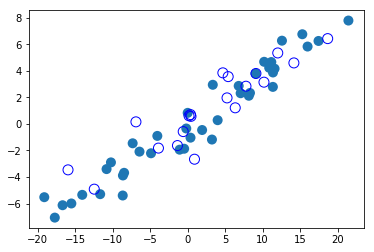

In [12]:
from sklearn.model_selection import train_test_split

plot.figure()
data_train, data_test, label_train, label_test = train_test_split(data[:,0], data[:,1], test_size=0.33)
plot.scatter(data_train, label_train, s=100, edgecolors='none')
plot.scatter(data_test,label_test, c='none', s=100, edgecolors='blue')

## Let us look at a linear model for regression problem. See <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">LRM</a> and <a href="https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">this details.</a>

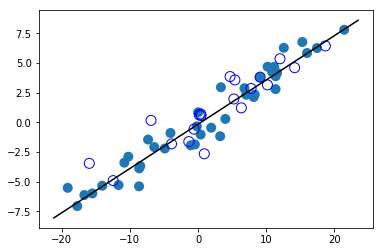

In [13]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

# training and test score for the split
data_train_flat = data_train.reshape(-1,1)
regression.fit(data_train_flat, label_train)

# determination coefficients
train_score = regression.score(data_train_flat, label_train)

train_score = data_test_flat = data_test.reshape(-1,1)

test_score = regression.score(data_test_flat, label_test)


plot.figure()
plot.scatter(data_train, label_train, s=100, edgecolors='none')
plot.scatter(data_test, label_test, c='none', s=100, edgecolors='blue')

x_min, x_max = plot.xlim()
mm = np.linspace(x_min, x_max, 100)
plot.plot(mm,regression.predict(mm.reshape(-1,1)),color='black')

The results are evaluated here through the coefficient of determination, which is the ratio between the variance explained by the model and the total variance (of the explained variable), see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html">detailed explanations</a>.

# Question

#### Calculate the mean squared error of the model on the training data and then on the test data.

To obtain the mean squared error of the model we compute the $L2$ norm of the difference between predictions and observations, using the $linalg.norm ()$ function of $scipy$ see <a href="http://cedric.cnam.fr/vertigo/Cours/ml/tpIntroductionScikitLearn.html#scipy">(e.g. here)</a>.

In [14]:
from scipy import linalg
lse_train = linalg.norm(regression.predict(data_train.reshape(-1, 1)) - label_train)
lse_test = linalg.norm(regression.predict(data_test.reshape(-1, 1)) - label_test)

print (lse_train, lse_test)

(6.264418996622873, 6.075898216059552)


We can increase the variance on the axis with  lowest variance  by modifying the expansion(dilatation) matrix

In [15]:
a = 2
scale = np.array([[10, 0], [0, a]])

Be careful, as for the initial data, you must first apply the dilation (.dot (scale)) and then the rotation (.dot (rotation)).

# Question

What is the impact of this increase on the coefficient of determination obtained on the test data? Changes $a$ to $4$ then $6$. You can graph the evolution of the value obtained for regression.score (data_test.reshape (-1,1), label_test) when $a$ increases.

The more the data is "scattered" around the regression line, the lower the coefficient of determination.

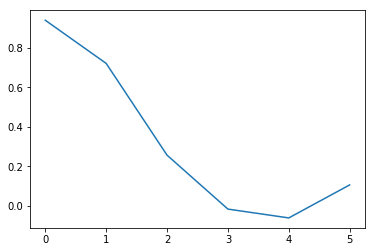

In [16]:
coeff_det = []
for a in range(1, 7):
    scale = np.array([[10, 0], [0, a]])
    datacoef = randomdata.dot(scale).dot(rotation)
    data_train1, data_test1, label_train1, label_test1 =\
              train_test_split(datacoef[:,0], datacoef[:,1], test_size=0.33)
    regression1 = linear_model.LinearRegression()
    regression.fit(data_train1.reshape(-1,1), label_train1)
    coeff_det.append(regression.score(data_test1.reshape(-1,1), label_test1))

plot.figure()
plot.plot(coeff_det)

#####  Let us use a MLP for this regression problem. For this we will be using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor">MLP</a>.  Also see <a href="https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression">Also check this out</a>. 

We first use a weight decay coefficient of $alpha = 1e^{-5}.$

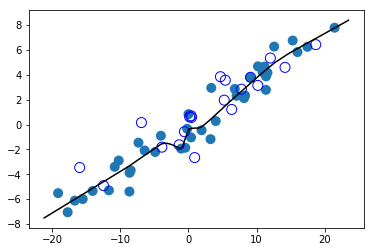

In [17]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(solver='lbfgs', alpha=1e-5)


mlpr.fit(data_train.reshape(-1,1), label_train)
mlpr.score(data_train.reshape(-1,1), label_train)

mlpr.score(data_test.reshape(-1,1), label_test)



plot.figure()
plot.scatter(data_train, label_train, s=100, edgecolors='none')
plot.scatter(data_test, label_test, c='none', s=100, edgecolors='blue')
x_min, x_max = plot.xlim()
mm = np.linspace(x_min, x_max, 100)
plot.plot(mm,mlpr.predict(mm.reshape(-1,1)),color='black')


# Question

#### Repeat the experiment with alpha = 1. What is the consequence on the results?

The regression curve is smoother with alpha = 1 than with alpha = 1e-5.